https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
X6 = the repayment status in September, 2005; 
X7 = the repayment status in August, 2005; . . .;
X11 = the repayment status in April, 2005. 

The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). 
X12 = amount of bill statement in September, 2005; 
X13 = amount of bill statement in August, 2005; . . .; 
X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). 
X18 = amount paid in September, 2005; 
X19 = amount paid in August, 2005; . . .;
X23 = amount paid in April, 2005.

Tujuan dari pemodelan ini adalah mencari tahu apakah customer gagal membayar kredit tepat waktu atau tidak

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
columns = ['Amount given Credit','Gender','Education','Marital Status',
           'Age','Repayment Sep','Repayment Aug','Repayment Jul','Repayment Jun',
           'Repayment May','Repayment Apr','Amount of Bill Sep','Amount of Bill Aug',
          'Amount of Bill Jul','Amount of Bill Jun','Amount of Bill May','Amount of Bill Apr',
          'Amount Prev Pay Sep','Amount Prev Pay Aug','Amount Prev Pay Jul','Amount Prev Pay Jun','Amount Prev Pay May',
          'Amount Prev Pay Apr','Default Payment']

dfraw = pd.read_excel('default of credit card clients.xls',header=1,index_col=0)
dfraw.columns=columns

In [51]:
dfraw.head()

,Amount given Credit,Gender,Education,Marital Status,Age,Repayment Sep,Repayment Aug,Repayment Jul,Repayment Jun,Repayment May,...,Amount of Bill Jun,Amount of Bill May,Amount of Bill Apr,Amount Prev Pay Sep,Amount Prev Pay Aug,Amount Prev Pay Jul,Amount Prev Pay Jun,Amount Prev Pay May,Amount Prev Pay Apr,Default Payment
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [52]:
dfraw.describe()

,Amount given Credit,Gender,Education,Marital Status,Age,Repayment Sep,Repayment Aug,Repayment Jul,Repayment Jun,Repayment May,...,Amount of Bill Jun,Amount of Bill May,Amount of Bill Apr,Amount Prev Pay Sep,Amount Prev Pay Aug,Amount Prev Pay Jul,Amount Prev Pay Jun,Amount Prev Pay May,Amount Prev Pay Apr,Default Payment
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [53]:
repcol = ['Repayment Sep','Repayment Aug','Repayment Jul','Repayment Jun','Repayment May','Repayment Apr']
billcol = ['Amount of Bill Sep','Amount of Bill Aug','Amount of Bill Jul','Amount of Bill Jun','Amount of Bill May','Amount of Bill Apr']
amountprevcol = ['Amount Prev Pay Sep','Amount Prev Pay Aug','Amount Prev Pay Jul','Amount Prev Pay Jun','Amount Prev Pay May','Amount Prev Pay Apr']

In [54]:
dfraw['Repayment Sep'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: Repayment Sep, dtype: int64

In [55]:
dfraw[repcol] = dfraw[repcol].replace({-1:0,-2:0})

In [56]:
#total Bill selama 6 bulan terakhir

def total_bill(df):
    temp = 0
    for i in billcol:
        temp+=df[i]
    return temp

dfraw['Total Bill'] = dfraw.apply(total_bill, axis=1)

In [57]:
#total yang sudah dibayar

def total_pay(df):
    temp = 0
    for i in amountprevcol:
        temp+= df[i]
    return temp

dfraw['Total Pay'] = dfraw.apply(total_pay,axis=1)

In [58]:
#berapa kali telat pembayaran

def late_count(df):
    temp = 0
    for i in repcol:
        if df[i] > 0:
            temp += 1
        else:
            temp += 0
    return temp


dfraw['Count Late'] = dfraw.apply(late_count, axis=1)

In [59]:
# rata rata telat perbulan

dfraw['Mean Pay Late'] = (dfraw['Repayment Sep'] + dfraw['Repayment Aug'] + dfraw['Repayment Jul'] + dfraw['Repayment Jun'] + dfraw['Repayment May'] + dfraw['Repayment Apr'])/6

In [60]:
dfraw['Debt'] = dfraw['Total Bill'] - dfraw['Total Pay']

def positif(df):
    if df<0:
        return 0
    else:
        return df
        
dfraw['Debt'] = dfraw['Debt'].apply(positif)

In [61]:
dfraw

,Amount given Credit,Gender,Education,Marital Status,Age,Repayment Sep,Repayment Aug,Repayment Jul,Repayment Jun,Repayment May,...,Amount Prev Pay Jul,Amount Prev Pay Jun,Amount Prev Pay May,Amount Prev Pay Apr,Default Payment,Total Bill,Total Pay,Count Late,Mean Pay Late,Debt
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,1,7704,689,2,0.666667,7015
2,120000,2,2,2,26,0,2,0,0,0,...,1000,1000,0,2000,1,17077,5000,2,0.666667,12077
3,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,1000,5000,0,101653,11018,0,0.000000,90635
4,50000,2,2,1,37,0,0,0,0,0,...,1200,1100,1069,1000,0,231334,8388,0,0.000000,222946
5,50000,1,2,1,57,0,0,0,0,0,...,10000,9000,689,679,0,109339,59049,0,0.000000,50290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,5003,3047,5000,1000,0,725349,42550,0,0.000000,682799
29997,150000,1,3,2,43,0,0,0,0,0,...,8998,129,0,0,0,21182,14490,0,0.000000,6692
29998,30000,1,2,2,37,4,3,2,0,0,...,22000,4200,2000,3100,1,70496,31300,3,1.500000,39196


In [62]:
dfraw['Default Payment'].value_counts()

0    23364
1     6636
Name: Default Payment, dtype: int64

In [63]:
dfraw['Education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: Education, dtype: int64

In [64]:
dfraw['Education'] = dfraw['Education'].replace({0:4,5:4,6:4})

In [65]:
dfraw['Marital Status'] = dfraw['Marital Status'].replace({0:3})

In [66]:
dfraw['Marital Status'].value_counts()

2    15964
1    13659
3      377
Name: Marital Status, dtype: int64

In [67]:
dfraw.to_csv('dfraw.csv',index=False)

In [68]:
dfraw.to_html("dataset.html",index=False) 

In [69]:
df = pd.read_csv('dfraw.csv')

In [70]:
df['Education'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: Education, dtype: int64

In [71]:
df['Gender'] = df['Gender'].replace({1:'Male',2:'Female'})

In [72]:
df['Education'] = df['Education'].replace({1:'Graduate School',2:'University',3:'High School',4:'Others'})

In [73]:
df['Marital Status'] = df['Marital Status'].replace({1:'Married',2:'Single',3:'Others'})

In [74]:
df.to_csv('df.csv',index=False)

In [75]:
df.head()

,Amount given Credit,Gender,Education,Marital Status,Age,Repayment Sep,Repayment Aug,Repayment Jul,Repayment Jun,Repayment May,...,Amount Prev Pay Jul,Amount Prev Pay Jun,Amount Prev Pay May,Amount Prev Pay Apr,Default Payment,Total Bill,Total Pay,Count Late,Mean Pay Late,Debt
0,20000,Female,University,Married,24,2,2,0,0,0,...,0,0,0,0,1,7704,689,2,0.666667,7015
1,120000,Female,University,Single,26,0,2,0,0,0,...,1000,1000,0,2000,1,17077,5000,2,0.666667,12077
2,90000,Female,University,Single,34,0,0,0,0,0,...,1000,1000,1000,5000,0,101653,11018,0,0.000000,90635
3,50000,Female,University,Married,37,0,0,0,0,0,...,1200,1100,1069,1000,0,231334,8388,0,0.000000,222946
4,50000,Male,University,Married,57,0,0,0,0,0,...,10000,9000,689,679,0,109339,59049,0,0.000000,50290


## Checking Multivariate Outlier

In [76]:
from mahalanobis import Mahalanobis
df_test = dfraw
df_test['mahala_pack']= Mahalanobis(np.array(df_test),len(df_test)).distances

from scipy.stats import chi2
chi2.ppf((1-0.01), df=2)
# Mahala distance more than 9.21 is considered as outlier
# If using P-Value then the H0 is not outlier and the H1 is outlier

df_test['p-value']= 1-chi2.cdf(df_test['mahala_pack'],2)

def name_outlier(col):
    if col < 0.01:
        return 'Outlier'
    else:
        return 'Not Outlier'
df_test['Outlier']=df_test['p-value'].apply(name_outlier)
df_test

outlier_maha = df_test[df_test['Outlier']=='Outlier'].index

len(outlier_maha)

/opt/anaconda3/lib/python3.7/site-packages/mahalanobis/__init__.py:393: RuntimeWarning: invalid value encountered in sqrt
  distances_array = np.array(list(map(lambda difference: np.sqrt(np.dot(np.dot(difference, self._inv_cov_matrix), difference.reshape(-1,1))), diff_array)))
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


15842

In [82]:
df_test[df_test['Default Payment']==1]['Outlier'].value_counts()

Outlier        3544
Not Outlier    3092
Name: Outlier, dtype: int64

Karena multivariate outlier terlalu banyak, maka saya menghandle outlier menggunakan robust scaling dan memilih metode yang tidak sensitif terhadap outlier

# EDA

## Categorical Features

Female    0.207763
Male      0.241672
Name: Gender, dtype: float64


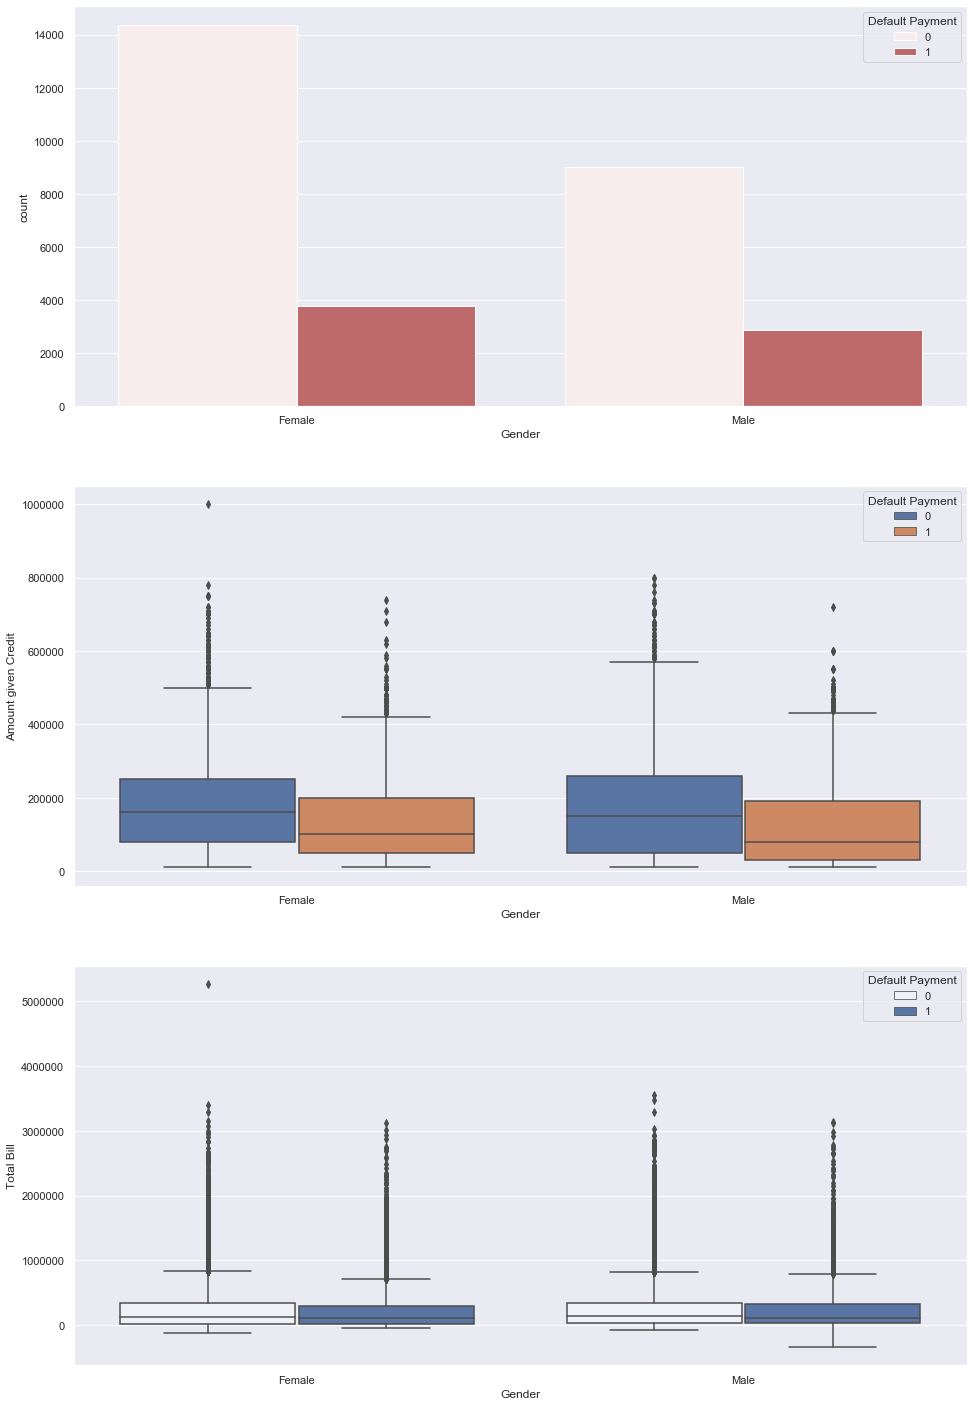

In [36]:
#melihat jumlah default payment berdasarkan gender
sns.set(style='darkgrid')

gender1 = df[df['Default Payment']==1]['Gender'].value_counts()
gender0 = df[df['Default Payment']==0]['Gender'].value_counts()

genderrate = gender1 / (gender1+gender0)
print(genderrate)

f, axes = plt.subplots(3, 1,figsize=(16,25))
sns.countplot(x= 'Gender', data=df,hue='Default Payment' , orient='v' , ax=axes[0],color='indianred')
sns.boxplot(  y='Amount given Credit', x= 'Gender',hue='Default Payment', data=df, ax=axes[1])
sns.boxplot(  y='Total Bill', x= 'Gender',hue='Default Payment', data=df, ax=axes[2],color='b')
plt.savefig('1.png')

Education Default Payment Rate
University         0.237349
Graduate School    0.192348
High School        0.251576
Others             0.070513
Name: Education, dtype: float64


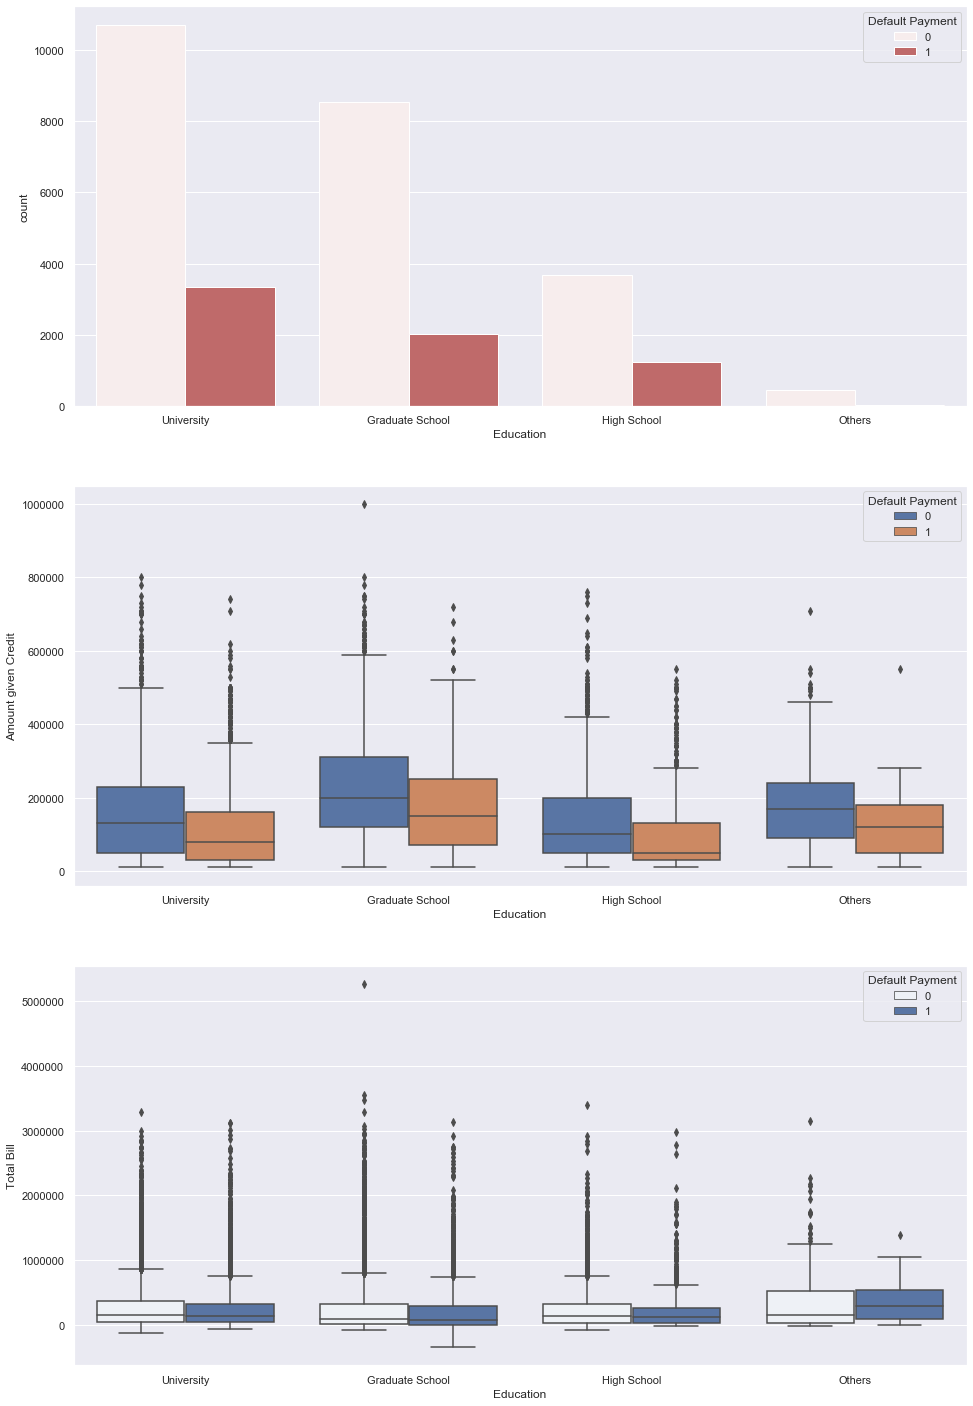

In [37]:
education1 = df[df['Default Payment']==1]['Education'].value_counts()
education0 = df[df['Default Payment']==0]['Education'].value_counts()

edurate = education1 / (education1+education0)
print('Education Default Payment Rate')
print(edurate)

f, axes = plt.subplots(3, 1,figsize=(16,25))
sns.countplot(x= 'Education', data=df,hue='Default Payment' , orient='v' , ax=axes[0],color='indianred')
sns.boxplot(  y='Amount given Credit', x= 'Education',hue='Default Payment', data=df, ax=axes[1])
sns.boxplot(  y='Total Bill', x= 'Education',hue='Default Payment', data=df, ax=axes[2],color='b')

plt.savefig('2.png')

Marital Status Default Payment Rate
Single     0.209283
Married    0.234717
Others     0.236074
Name: Marital Status, dtype: float64


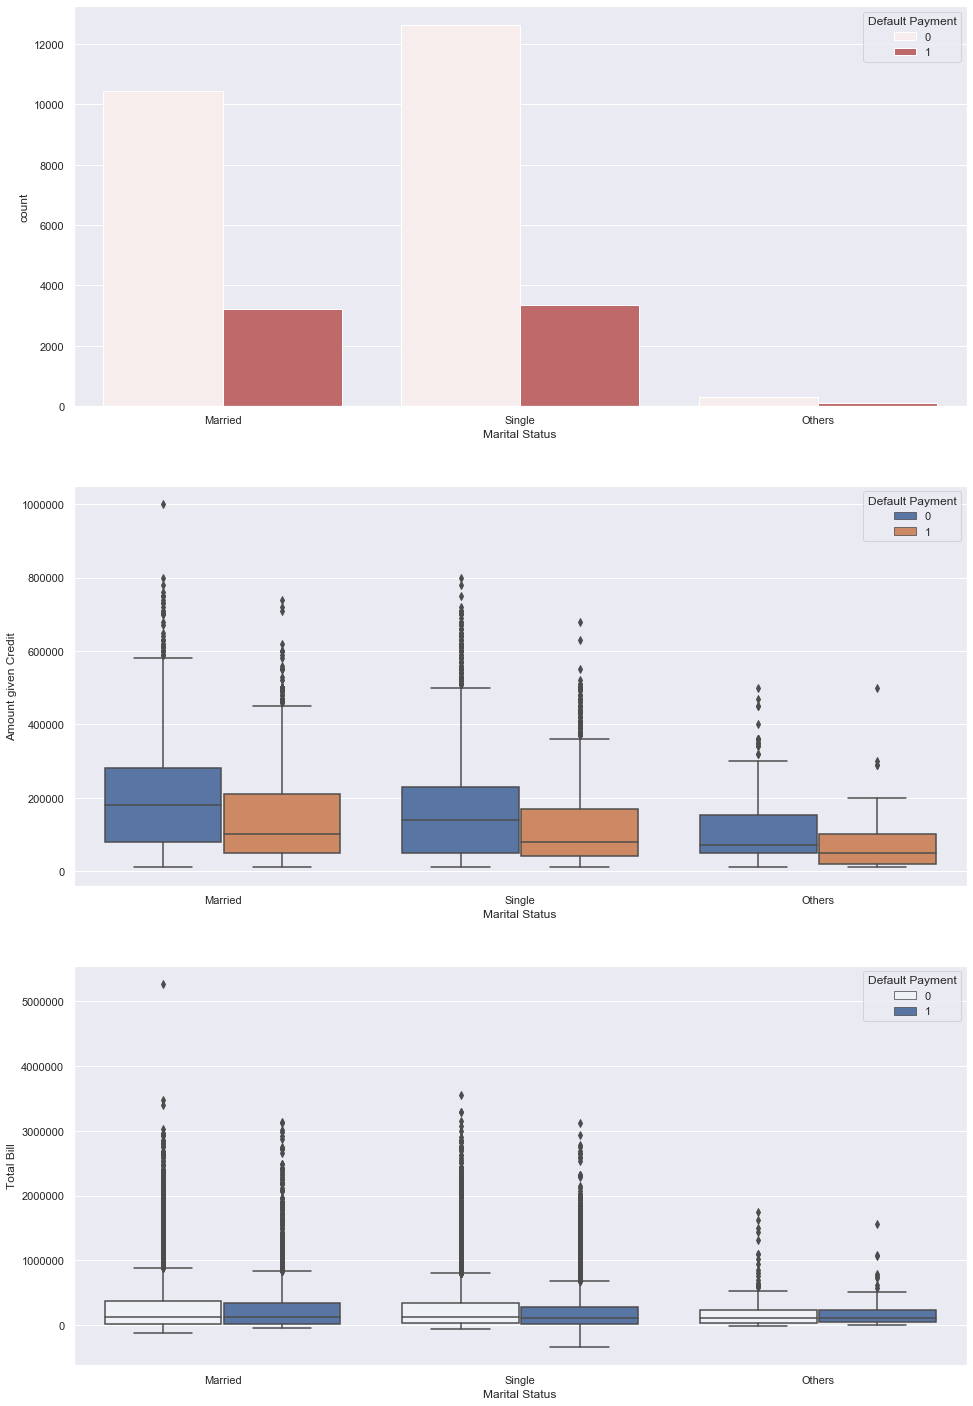

In [38]:
marital1 = df[df['Default Payment']==1]['Marital Status'].value_counts()
marital0 = df[df['Default Payment']==0]['Marital Status'].value_counts()

maritalrate = marital1 / (marital1+marital0)
print('Marital Status Default Payment Rate')
print(maritalrate)

f, axes = plt.subplots(3, 1,figsize=(16,25))
sns.countplot(x= 'Marital Status', data=df,hue='Default Payment' , orient='v' , ax=axes[0],color='indianred')
sns.boxplot(  y='Amount given Credit', x= 'Marital Status',hue='Default Payment', data=df, ax=axes[1])
sns.boxplot(  y='Total Bill', x= 'Marital Status',hue='Default Payment', data=df, ax=axes[2],color='b')

plt.savefig('3.png')

Customer dengan Marital Status yang married memiliki range pemberian kredit lebih besar dibanding status lainnya. Hal ini bisa jadi karena jumlah kredit yang diberikan termasuk milik pasangan juga seperti yang dijelaskan pada penjelasan feature

## Numerical Features

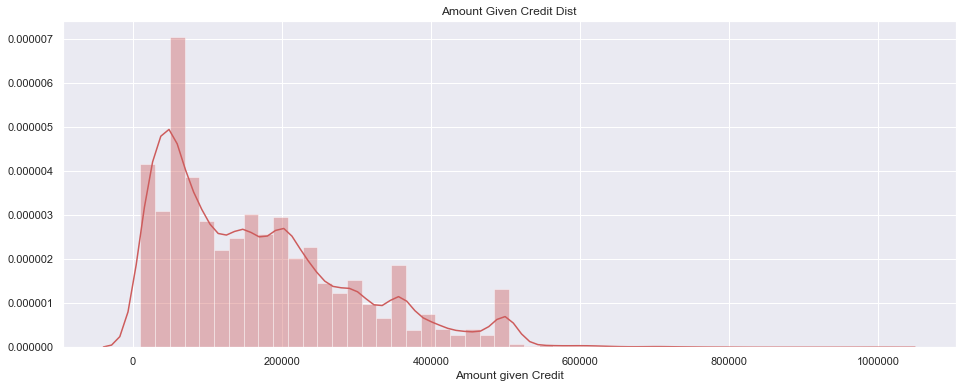

In [39]:
plt.figure(figsize=(16,6))
sns.distplot(df['Amount given Credit'],color='indianred')
plt.title('Amount Given Credit Dist')
plt.savefig('4.png')

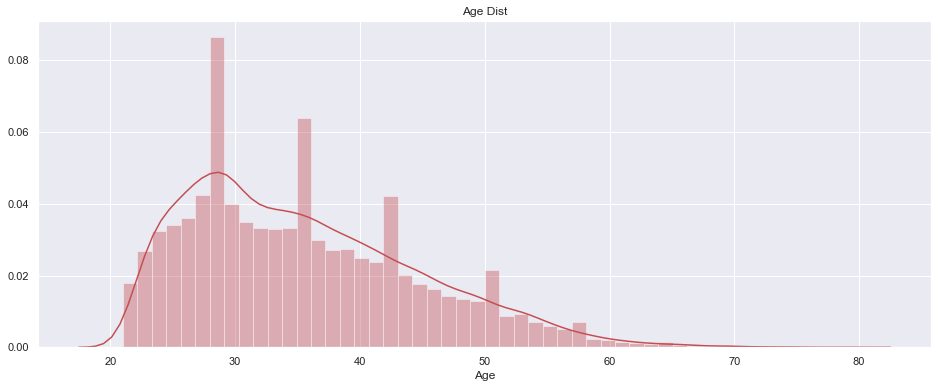

In [40]:
plt.figure(figsize=(16,6))
sns.distplot(df['Age'],color='r')
plt.title('Age Dist')
plt.savefig('5.png')

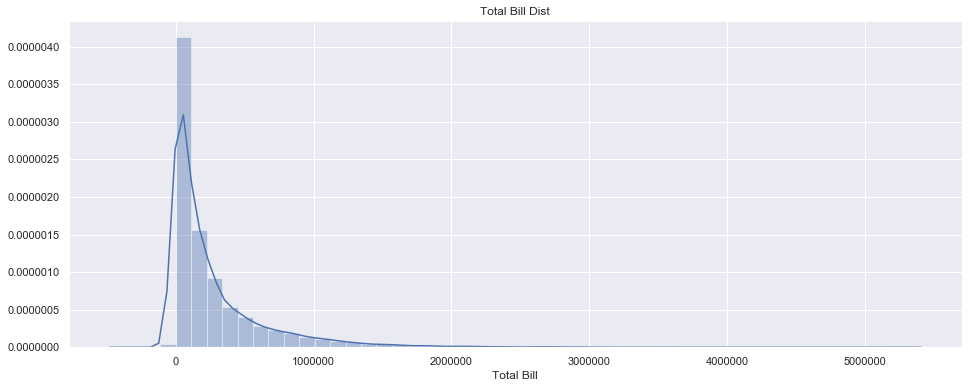

In [41]:
plt.figure(figsize=(16,6))
sns.distplot(df['Total Bill'])
plt.title('Total Bill Dist')
plt.savefig('6.png')

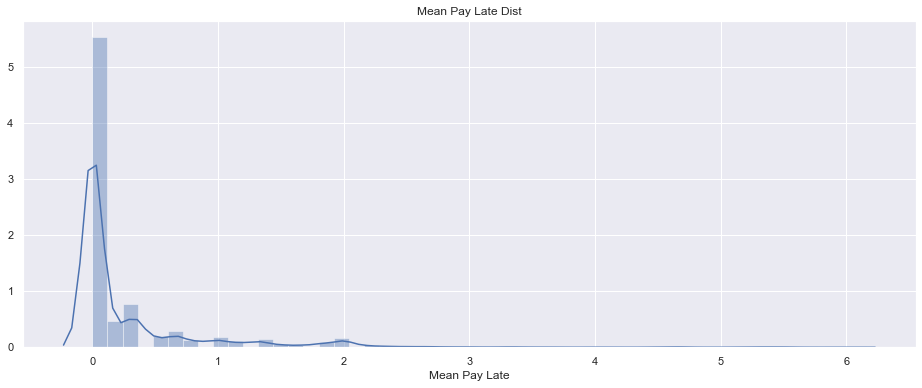

In [42]:
plt.figure(figsize=(16,6))
sns.distplot(df['Mean Pay Late'])
plt.title('Mean Pay Late Dist')
plt.savefig('7.png')

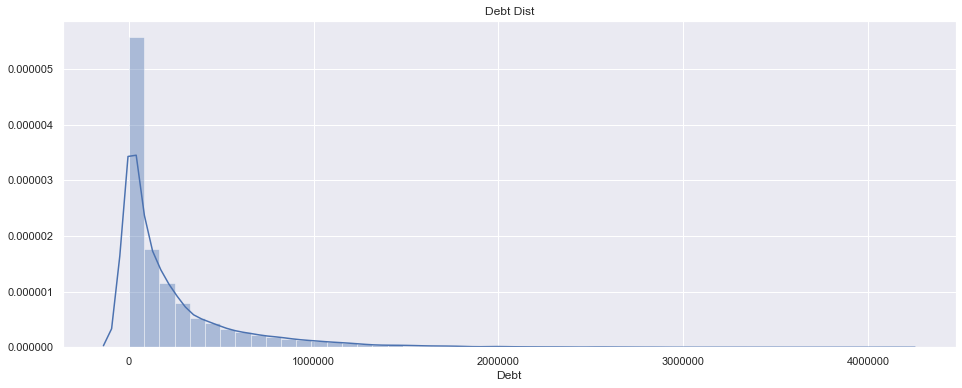

In [43]:
plt.figure(figsize=(16,6))
sns.distplot(df['Debt'])
plt.title('Debt Dist')
plt.savefig('8.png')

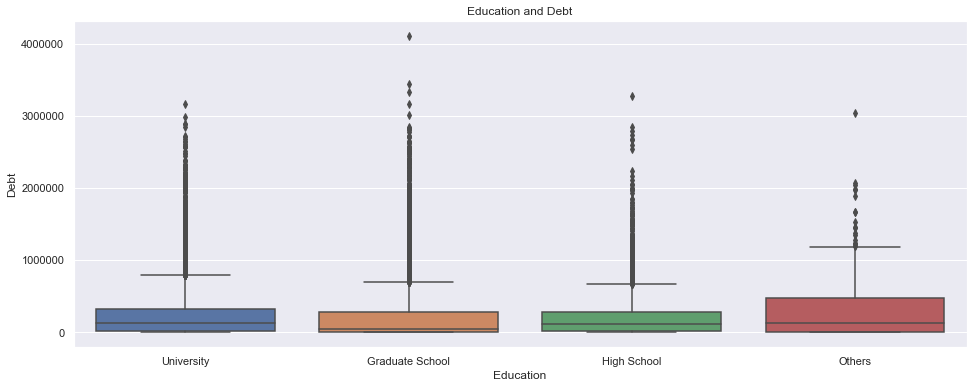

In [44]:
plt.figure(figsize=(16,6))
sns.boxplot(y=df['Debt'],x=df['Education'])
plt.title('Education and Debt')
plt.savefig('9.png')